In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.size

161100

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
df['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

<Figure size 2000x2000 with 0 Axes>

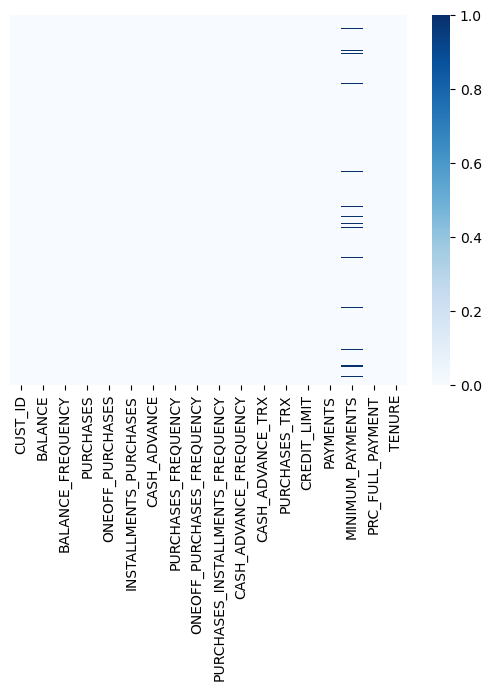

<Figure size 2000x2000 with 0 Axes>

In [13]:
sns.heatmap(df.isnull(),cmap='Blues',annot=False,yticklabels = False,cbar = True)
plt.figure(figsize=(20,20))

In [14]:
# - Obtain the row of the customer who made the maximim "ONEOFF_PURCHASES"
df.loc[df['ONEOFF_PURCHASES'].idxmax()]

CUST_ID                                  C10574
BALANCE                             11547.52001
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  8278.32
CASH_ADVANCE                         558.166886
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY       0.916667
CASH_ADVANCE_FREQUENCY                 0.083333
CASH_ADVANCE_TRX                              1
PURCHASES_TRX                               101
CREDIT_LIMIT                            22500.0
PAYMENTS                            46930.59824
MINIMUM_PAYMENTS                    2974.069421
PRC_FULL_PAYMENT                           0.25
TENURE                                       12
Name: 550, dtype: object

In [15]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
df.loc[df['MINIMUM_PAYMENTS'].isnull() == True,'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [17]:
df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [18]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
df.loc[df['CREDIT_LIMIT'].isnull() == True,'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [20]:
df.duplicated().sum()

0

In [21]:
df.drop('CUST_ID', axis = 1, inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
n = len(df.columns)
n

17

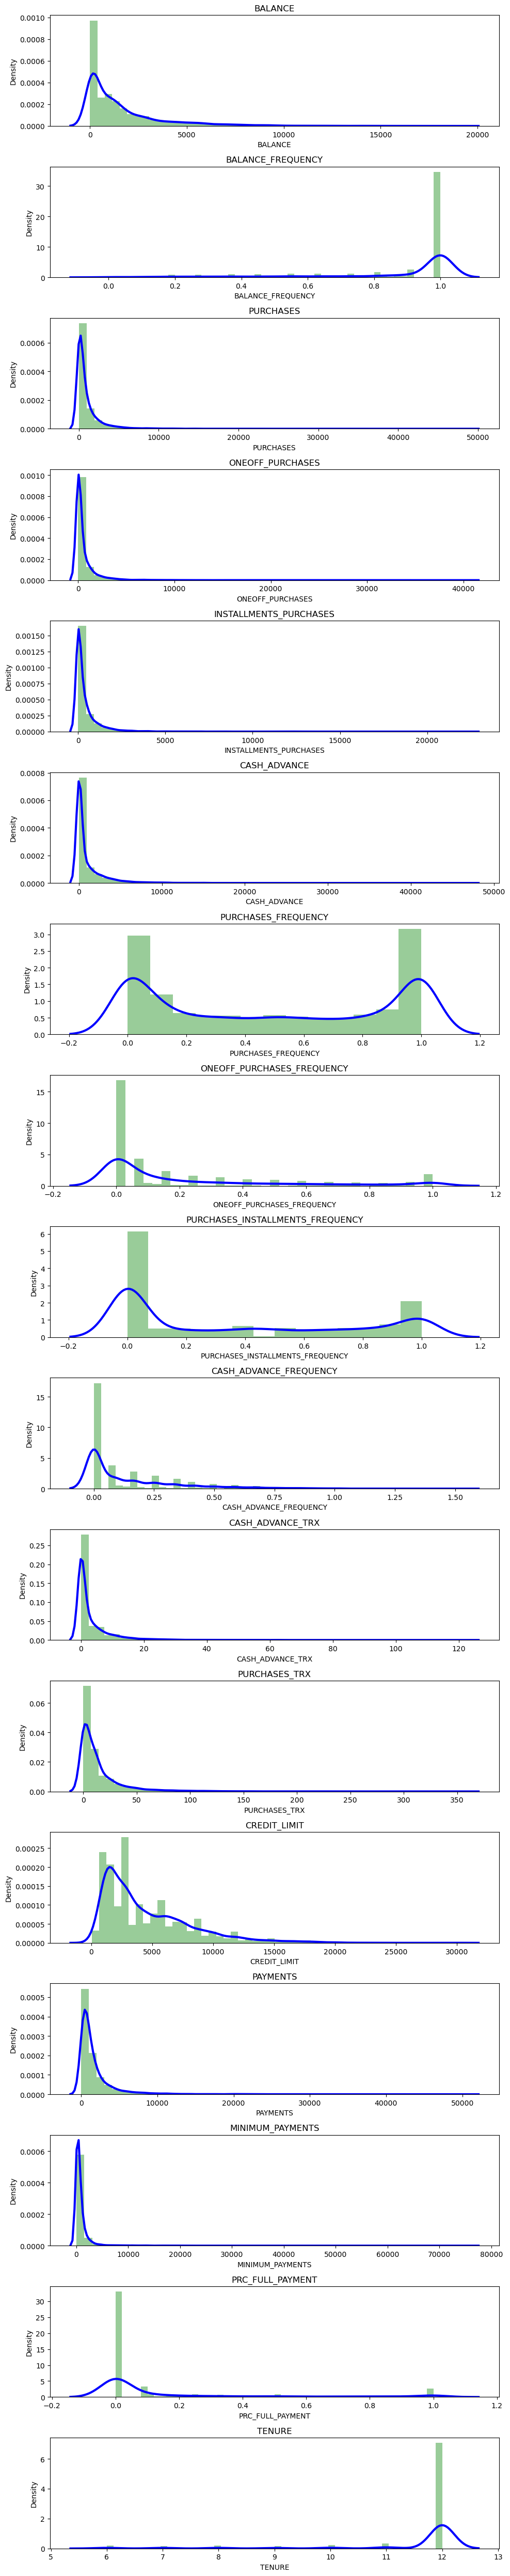

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

<AxesSubplot:xlabel='TENURE', ylabel='Density'>

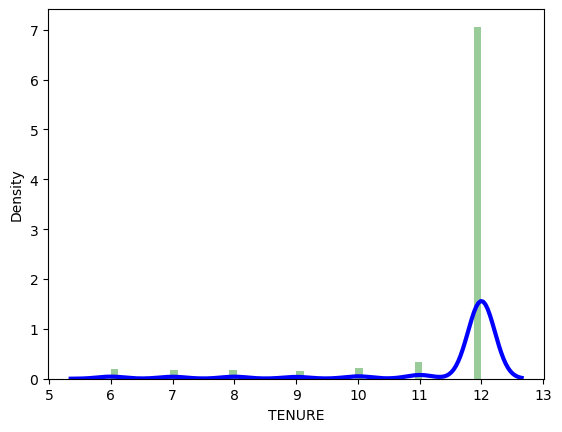

In [32]:
sns.distplot(df['TENURE'], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})

<AxesSubplot:>

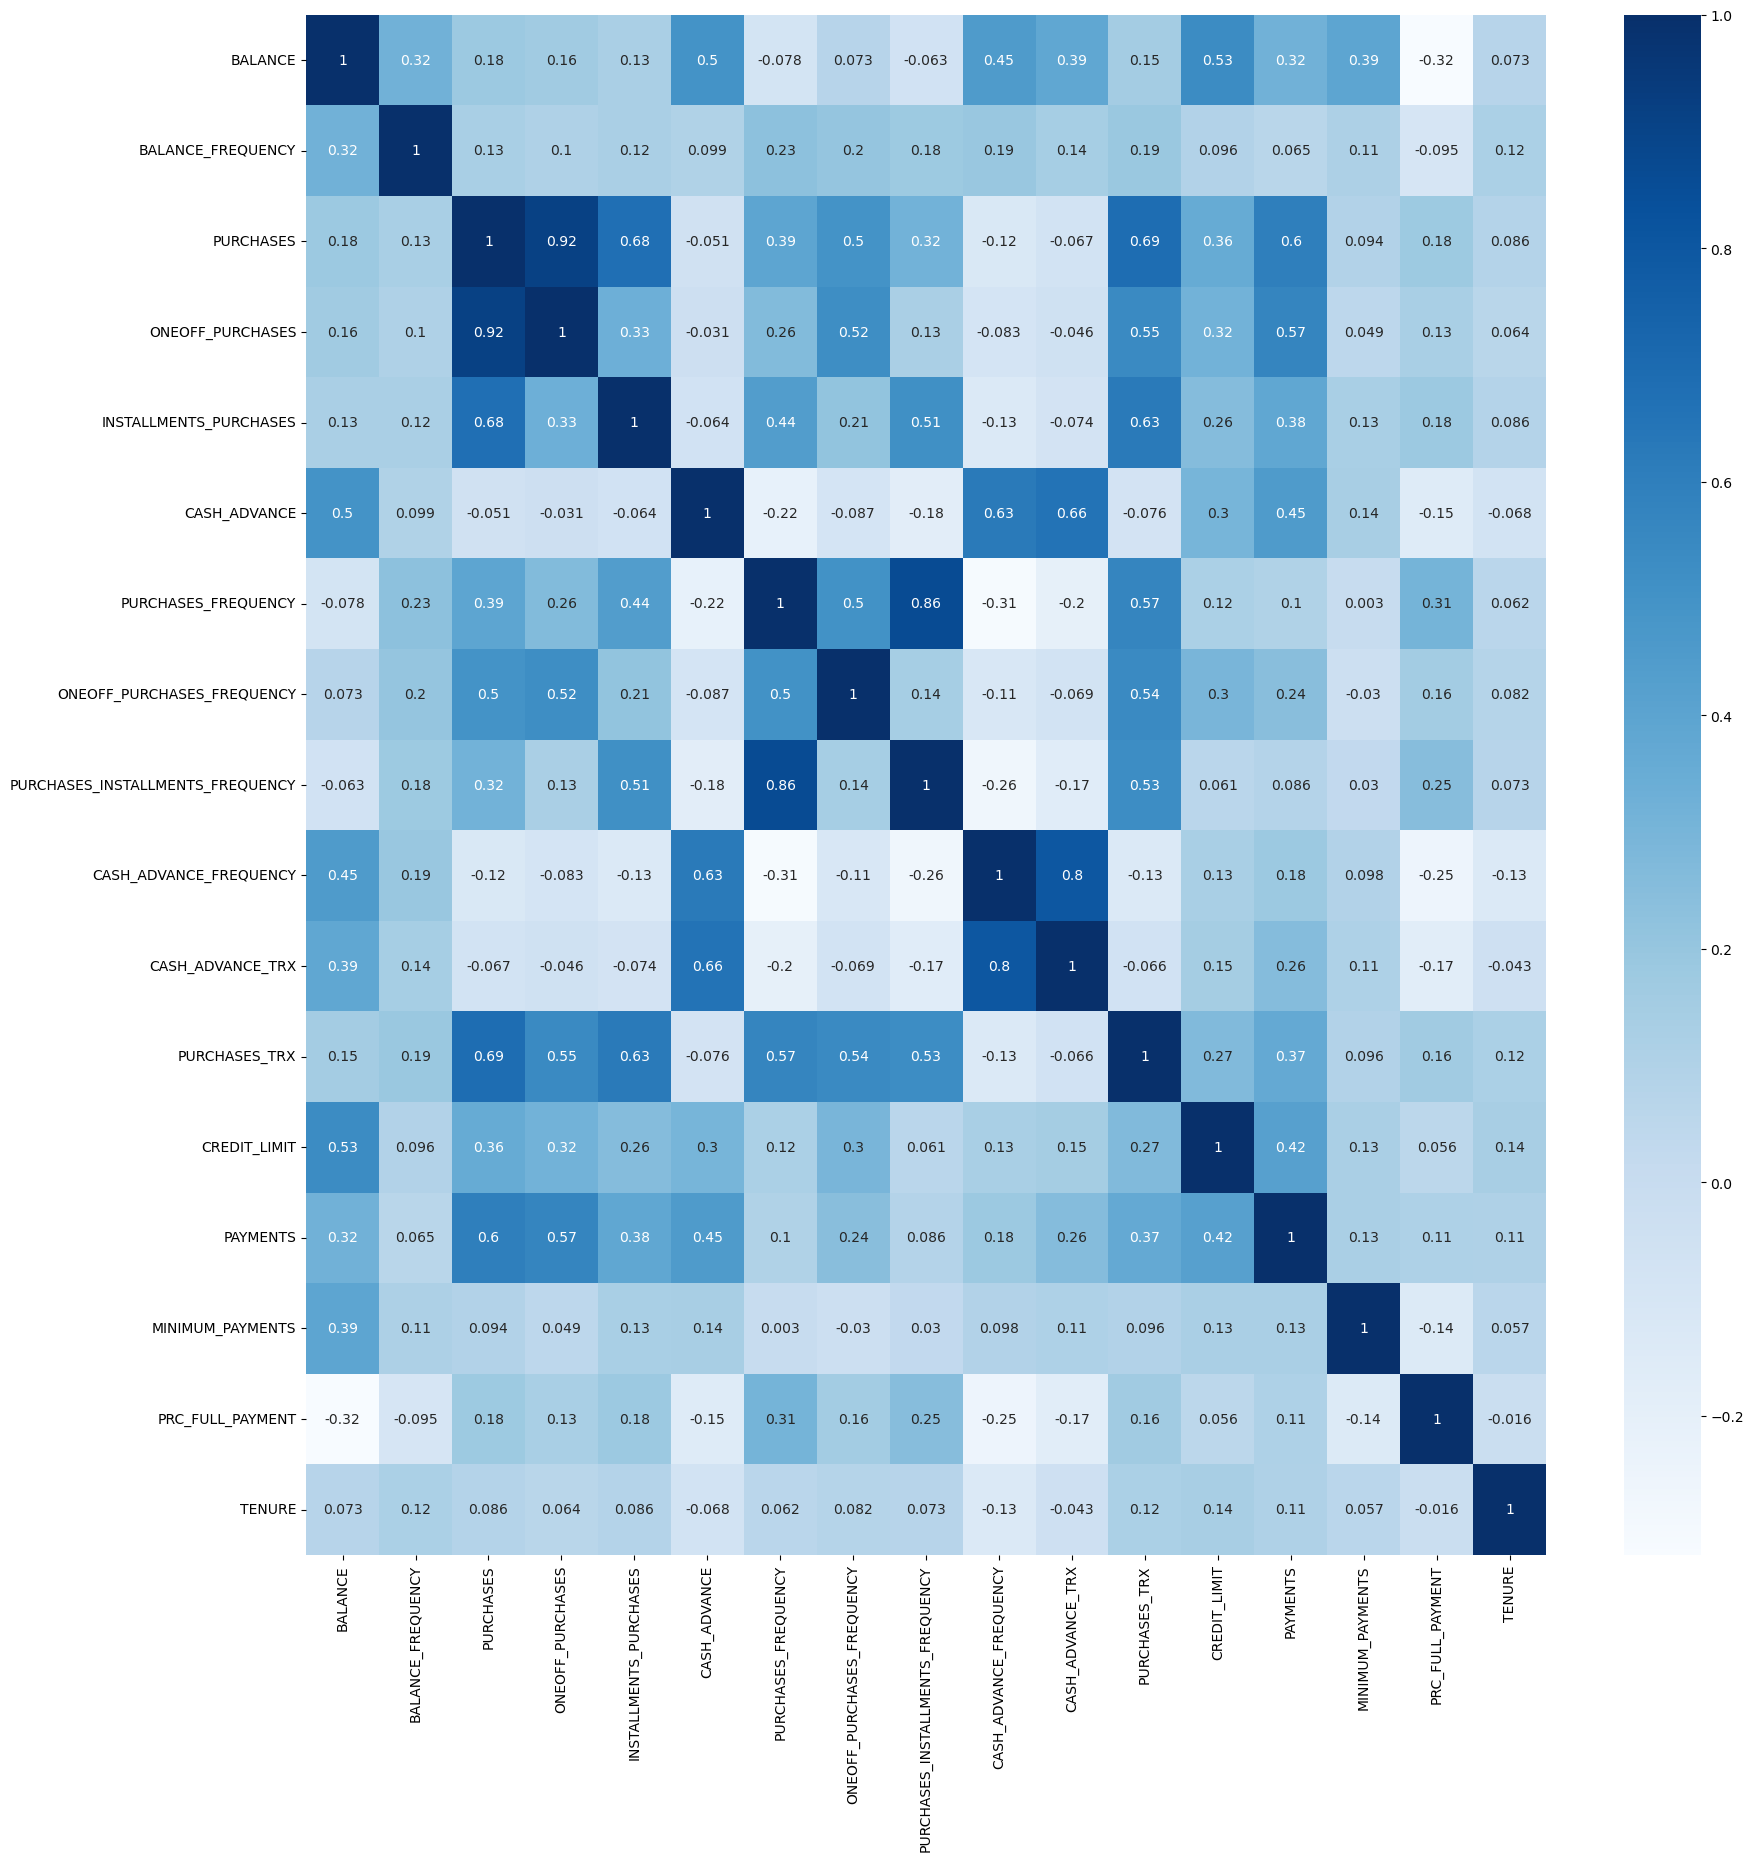

In [43]:
correlation = df.corr()
#f, ax = plt.subplots(figsize=(20,20))
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True, cmap='Blues')

# sns.heatmap(df.corr(),cmap='Blues',annot=False,yticklabels = True,cbar = True)
# plt.figure(figsize=(20,20))

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

<AxesSubplot:ylabel='Density'>

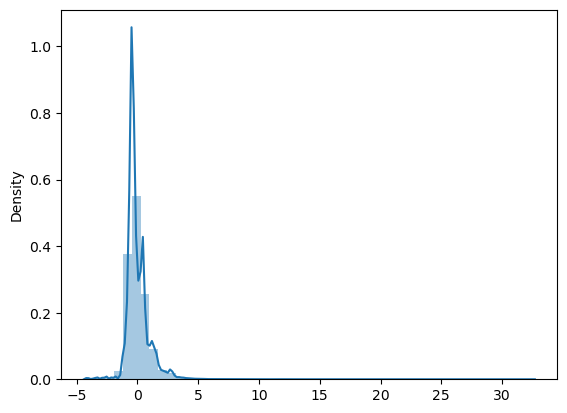

In [87]:
sns.distplot(scaled_df)

In [45]:
scores = []
range_values = range(1,20)

In [46]:
from sklearn.cluster import KMeans

In [47]:
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    scores.append(kmeans.inertia_)

Text(0, 0.5, 'scores')

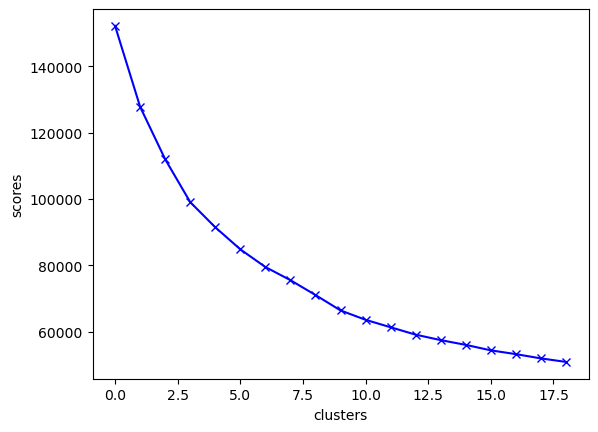

In [56]:
plt.plot(scores,'bx-')
plt.xlabel('clusters')
plt.ylabel('scores')


In [58]:
kmeans = KMeans(7)
kmeans.fit(scaled_df)
labels = kmeans.labels_
labels

array([2, 6, 1, ..., 4, 4, 4])

In [60]:
kmeans.cluster_centers_

array([[-3.72584409e-01,  3.30190596e-01, -4.05353765e-02,
        -2.33290869e-01,  3.32579661e-01, -3.67666061e-01,
         9.80631042e-01, -3.54157019e-01,  1.17267990e+00,
        -4.77697091e-01, -3.62456067e-01,  1.69999697e-01,
        -2.78980861e-01, -2.22474238e-01, -2.94386710e-02,
         3.08680284e-01,  2.52049768e-01],
       [ 1.38314940e-01,  4.31106480e-01,  9.47983016e-01,
         8.98856487e-01,  5.90118025e-01, -3.06992729e-01,
         1.09823036e+00,  1.87213030e+00,  5.44552993e-01,
        -4.07344122e-01, -3.16801711e-01,  1.21508583e+00,
         7.09464602e-01,  3.95762322e-01, -3.19896810e-02,
         4.59684837e-01,  3.07558133e-01],
       [ 3.58824863e-03,  4.03145979e-01, -3.42070351e-01,
        -2.22416241e-01, -4.00092211e-01, -1.12365690e-01,
        -8.07825701e-01, -3.32821463e-01, -7.52688025e-01,
         7.35625540e-02, -4.89453304e-02, -4.63778103e-01,
        -3.04504297e-01, -2.50144477e-01, -1.62107866e-02,
        -4.52931324e-01,  2.7

In [95]:
t = kmeans.transform(scaled_df)
t[0]

array([ 5.72151376,  3.11233027,  2.29377627,  1.6478305 ,  4.99548268,
        3.94789019, 14.84726929])

In [59]:
kmeans.cluster_centers_.shape

(7, 17)

In [66]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.372584,0.330191,-0.040535,-0.233291,0.332580,-0.367666,0.980631,-0.354157,1.172680,-0.477697,-0.362456,0.170000,-0.278981,-0.222474,-0.029439,0.308680,0.252050
1,0.138315,0.431106,0.947983,0.898856,0.590118,-0.306993,1.098230,1.872130,0.544553,-0.407344,-0.316802,1.215086,0.709465,0.395762,-0.031990,0.459685,0.307558
2,0.003588,0.403146,-0.342070,-0.222416,-0.400092,-0.112366,-0.807826,-0.332821,-0.752688,0.073563,-0.048945,-0.463778,-0.304504,-0.250144,-0.016211,-0.452931,0.272458
3,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,-0.701611,-2.134608,-0.307505,-0.230900,-0.302771,-0.320022,-0.549111,-0.429500,-0.442252,-0.520405,-0.375627,-0.417099,-0.171752,-0.192011,-0.257306,0.296865,0.202307
6,1.648047,0.396936,-0.208187,-0.152768,-0.211681,1.969802,-0.461628,-0.195888,-0.407632,1.901287,1.901479,-0.247070,0.996567,0.806474,0.541666,-0.395099,0.071954


In [67]:
#inverse scaling
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.372584,0.330191,-0.040535,-0.233291,0.332580,-0.367666,0.980631,-0.354157,1.172680,-0.477697,-0.362456,0.170000,-0.278981,-0.222474,-0.029439,0.308680,0.252050
1,0.138315,0.431106,0.947983,0.898856,0.590118,-0.306993,1.098230,1.872130,0.544553,-0.407344,-0.316802,1.215086,0.709465,0.395762,-0.031990,0.459685,0.307558
2,0.003588,0.403146,-0.342070,-0.222416,-0.400092,-0.112366,-0.807826,-0.332821,-0.752688,0.073563,-0.048945,-0.463778,-0.304504,-0.250144,-0.016211,-0.452931,0.272458
3,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,-0.701611,-2.134608,-0.307505,-0.230900,-0.302771,-0.320022,-0.549111,-0.429500,-0.442252,-0.520405,-0.375627,-0.417099,-0.171752,-0.192011,-0.257306,0.296865,0.202307
6,1.648047,0.396936,-0.208187,-0.152768,-0.211681,1.969802,-0.461628,-0.195888,-0.407632,1.901287,1.901479,-0.247070,0.996567,0.806474,0.541666,-0.395099,0.071954


In [68]:
labels.shape

(8950,)

In [69]:
labels.max()

6

In [73]:
y_kmeans = kmeans.fit_predict(scaled_df)
y_kmeans

array([3, 0, 4, ..., 5, 5, 5])

In [75]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


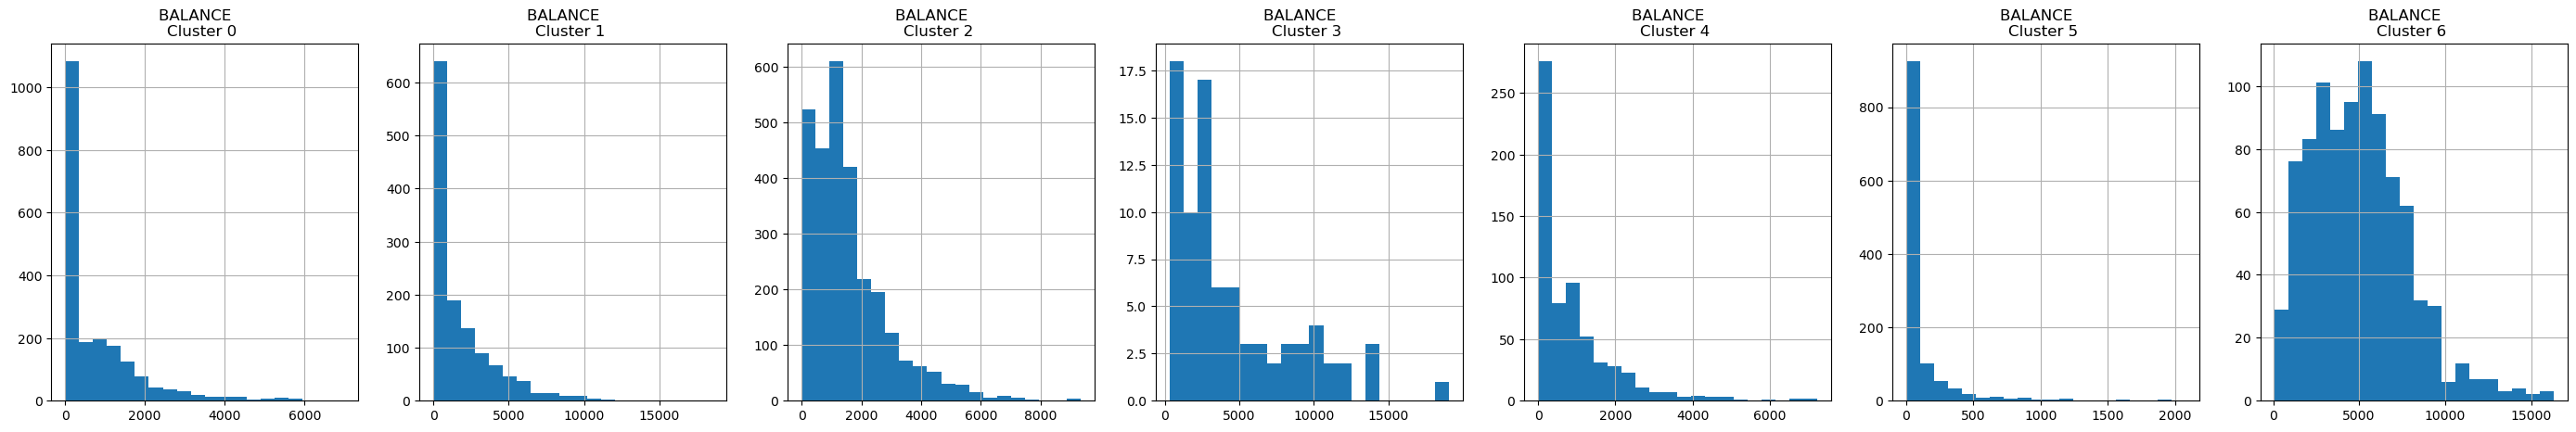

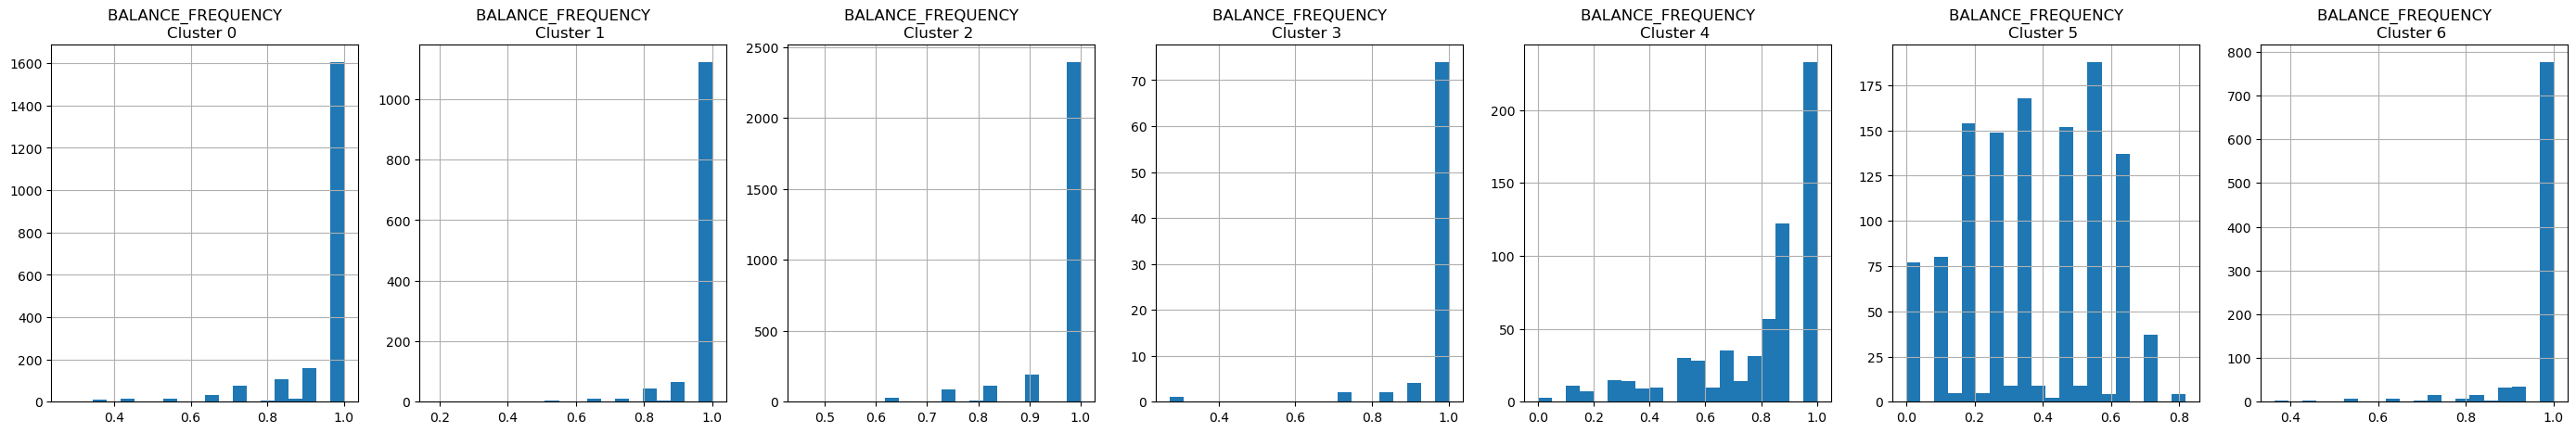

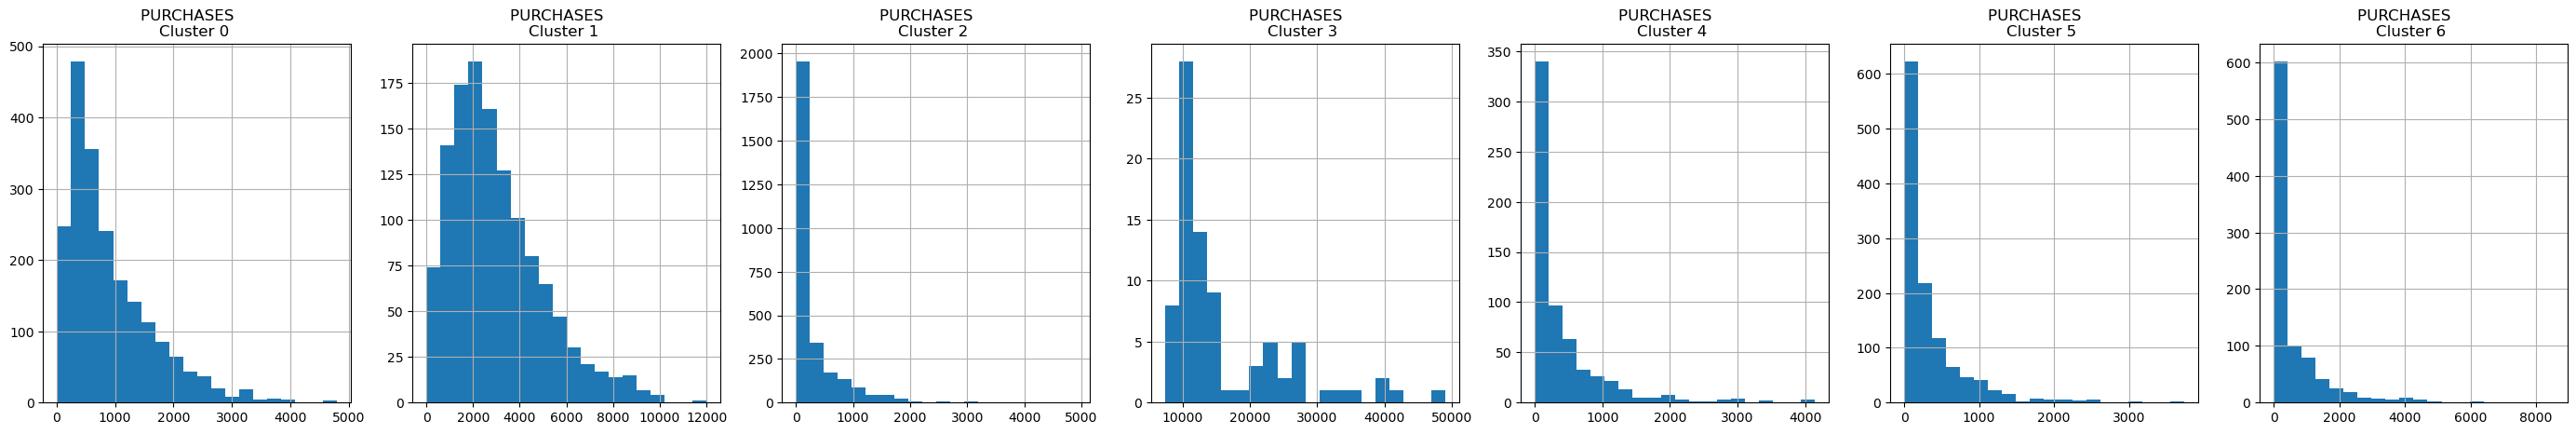

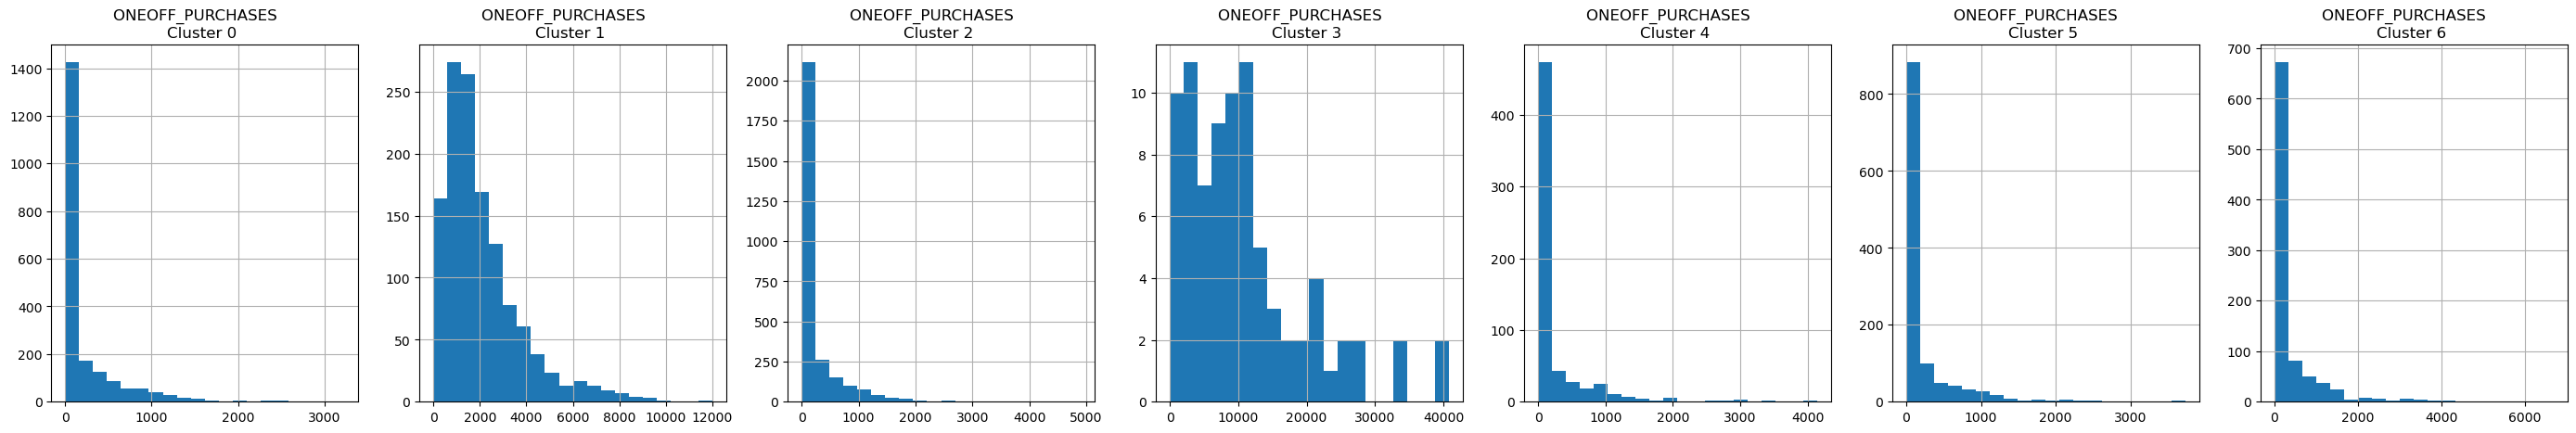

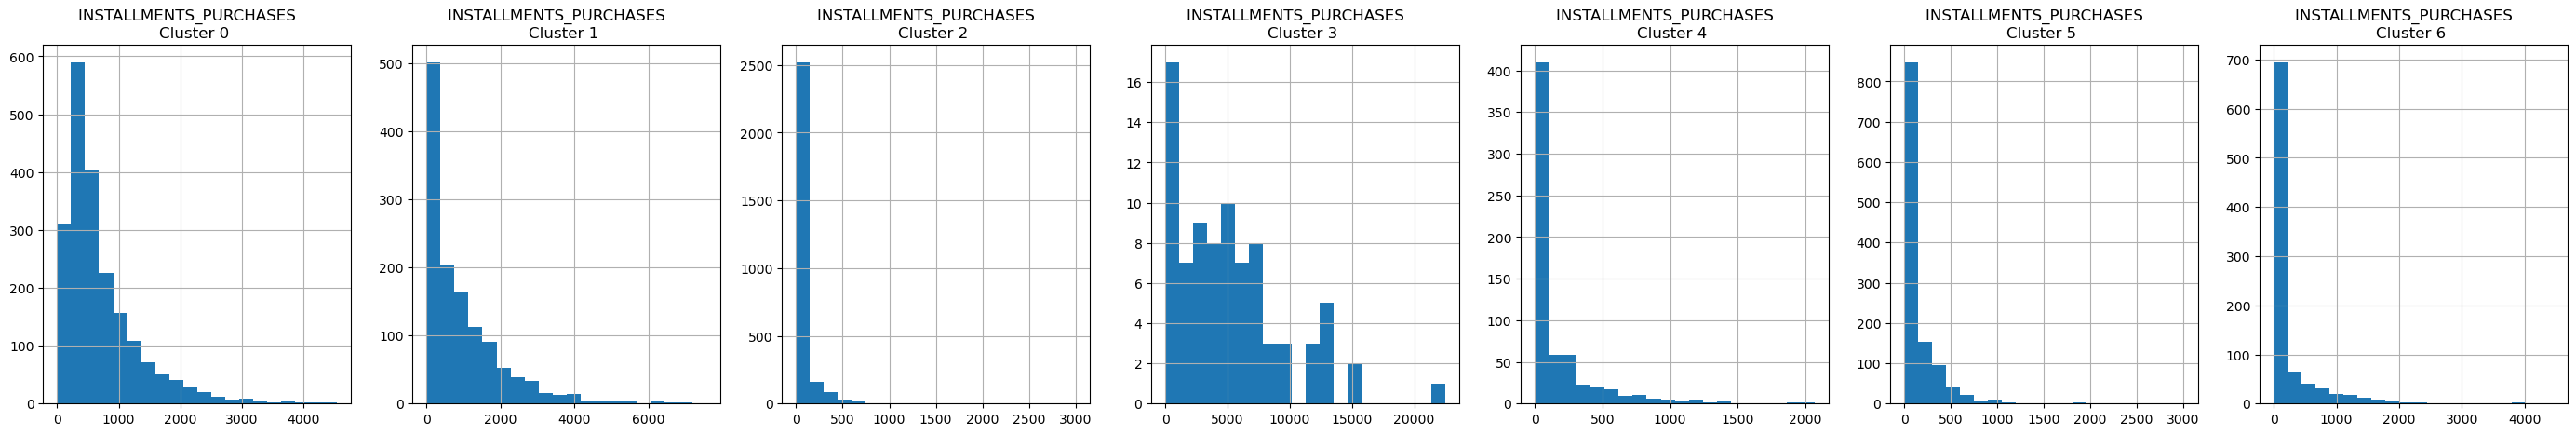

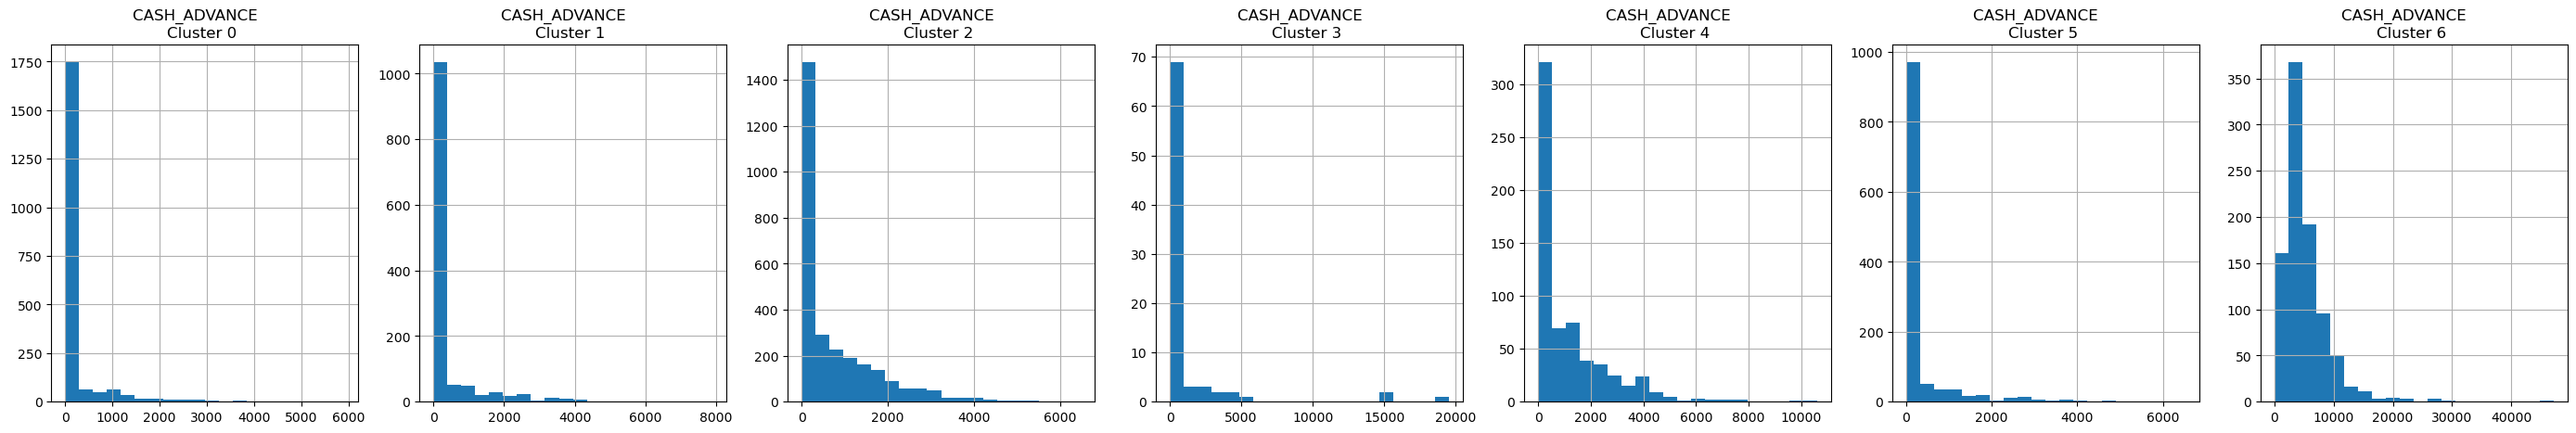

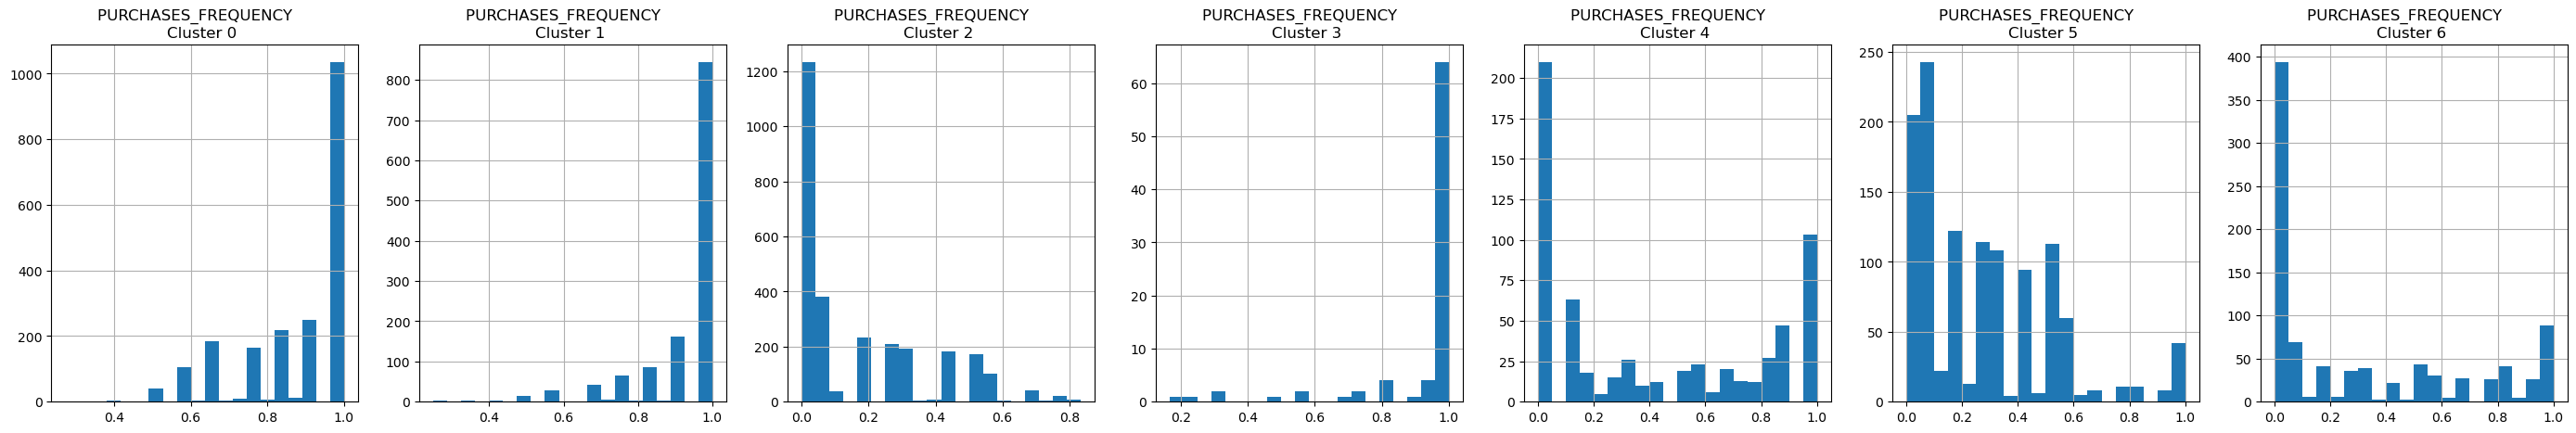

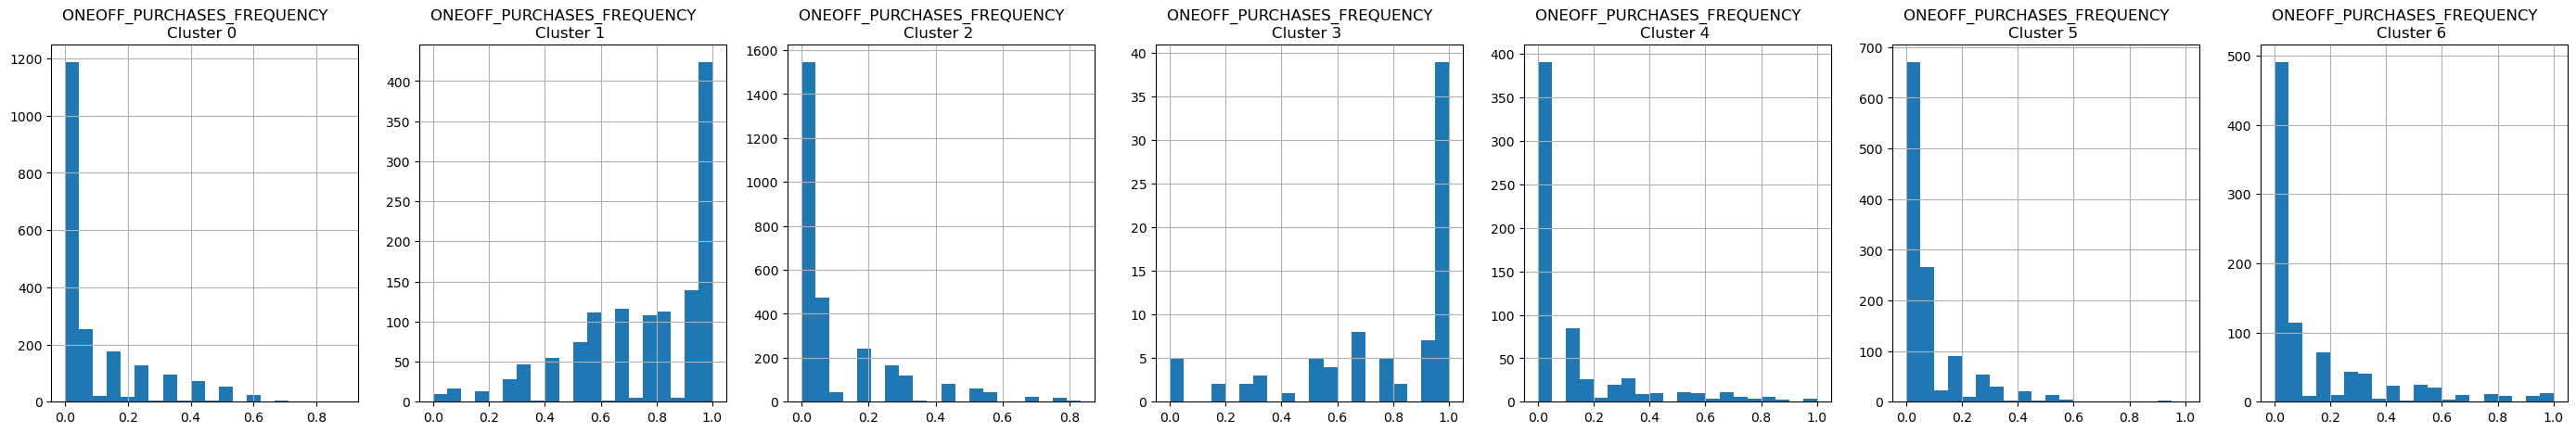

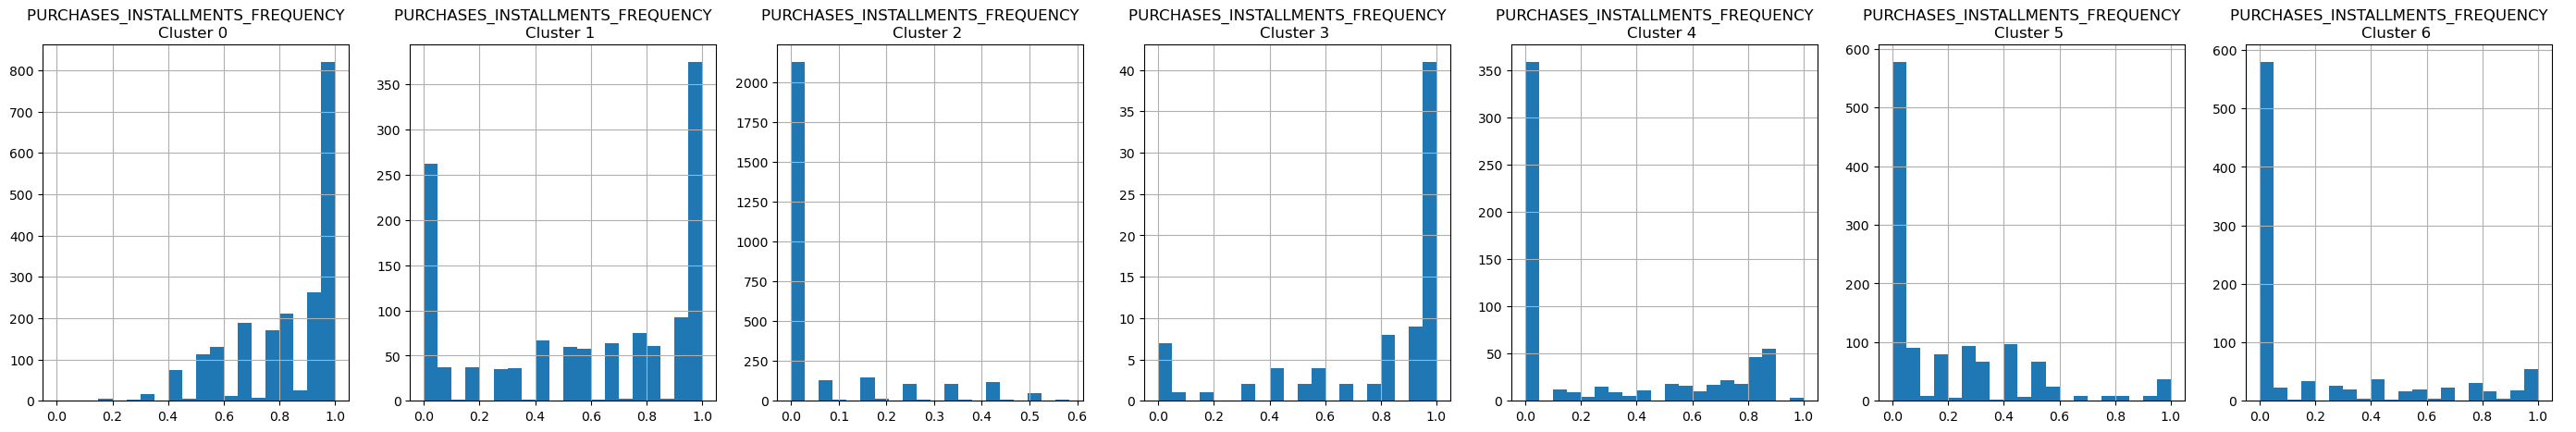

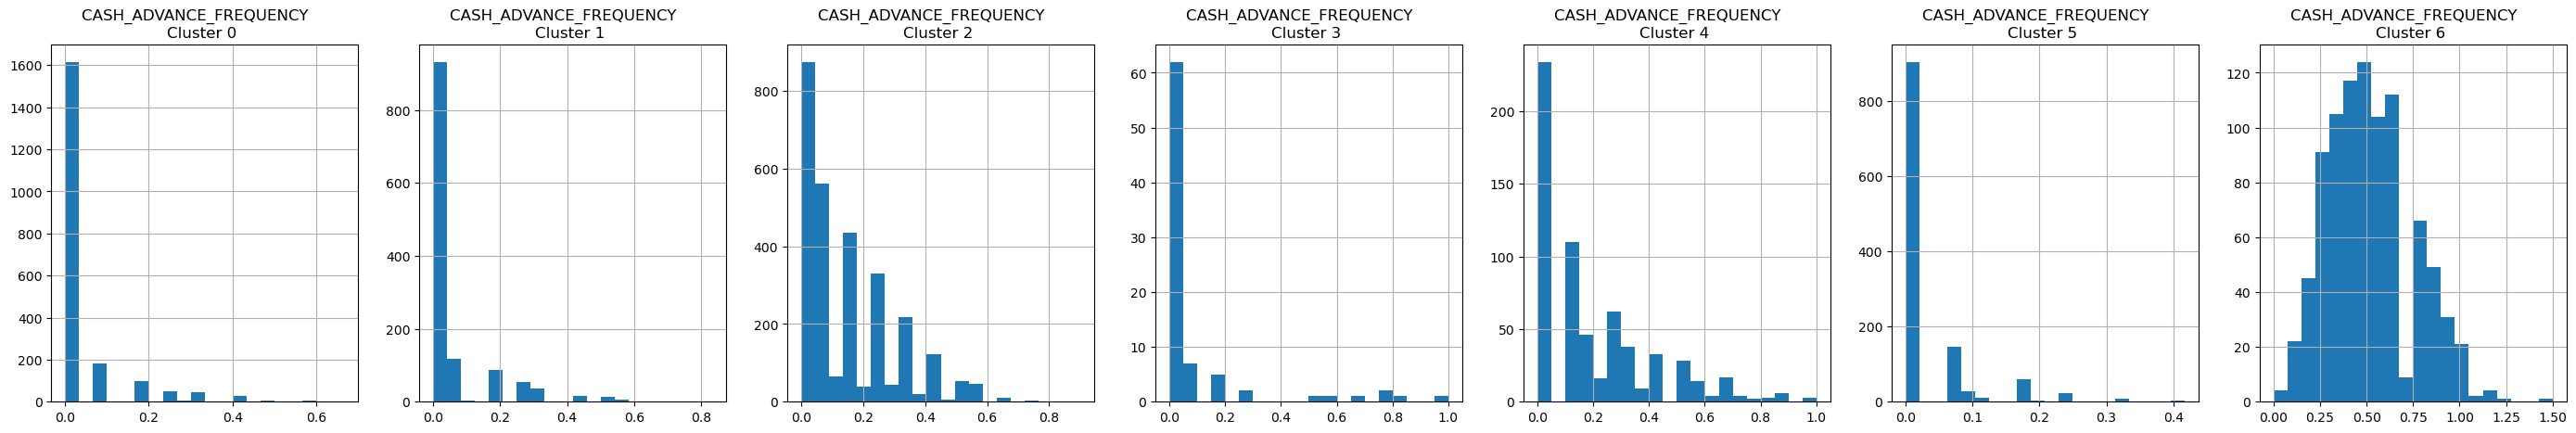

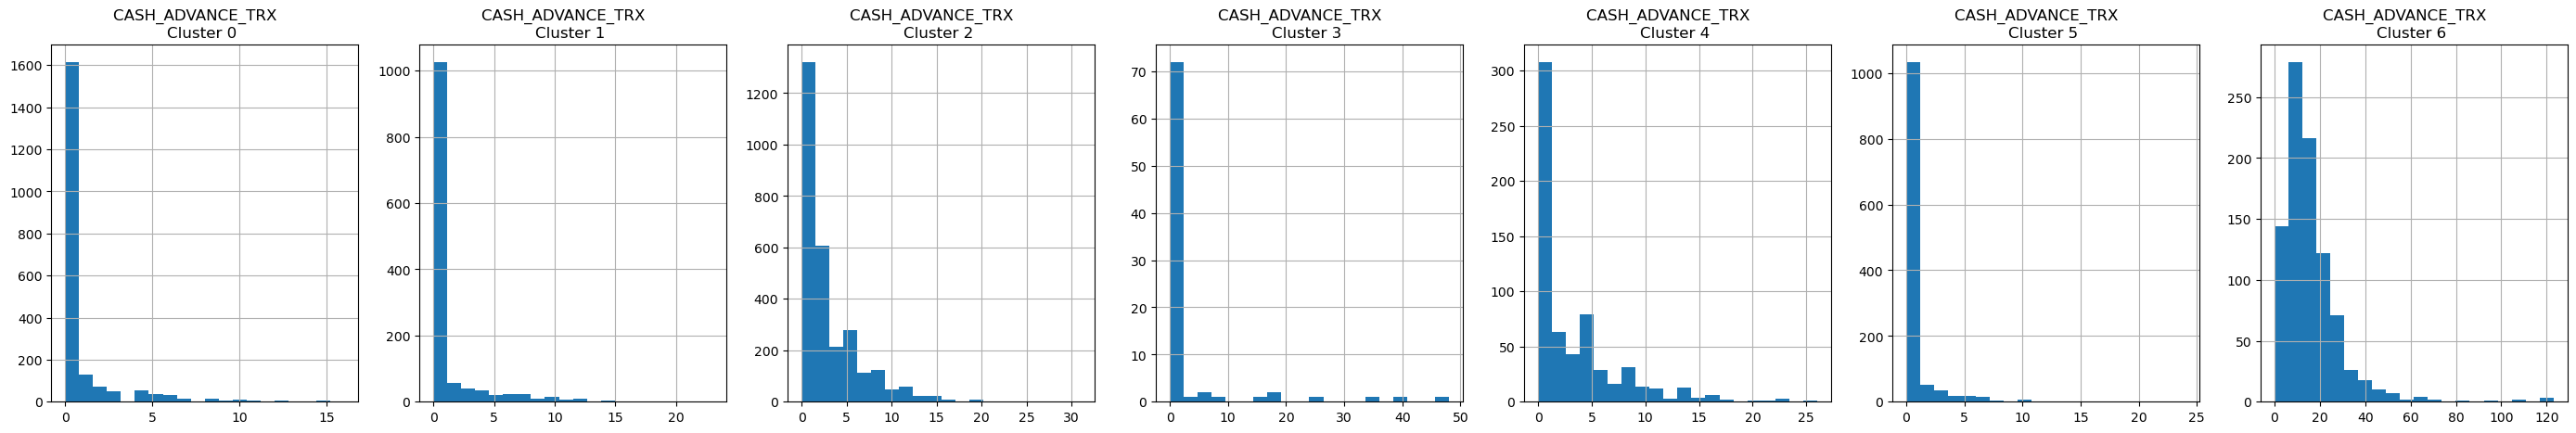

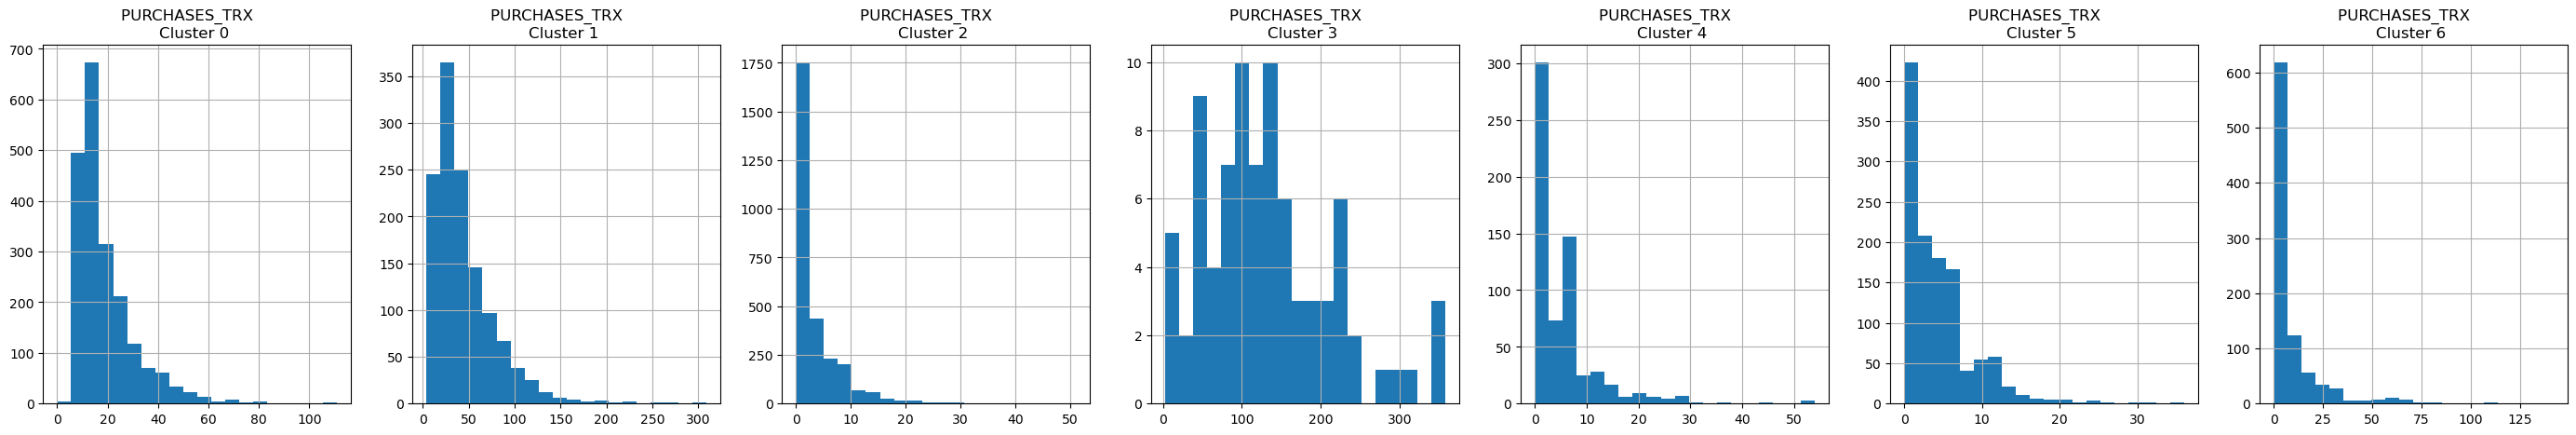

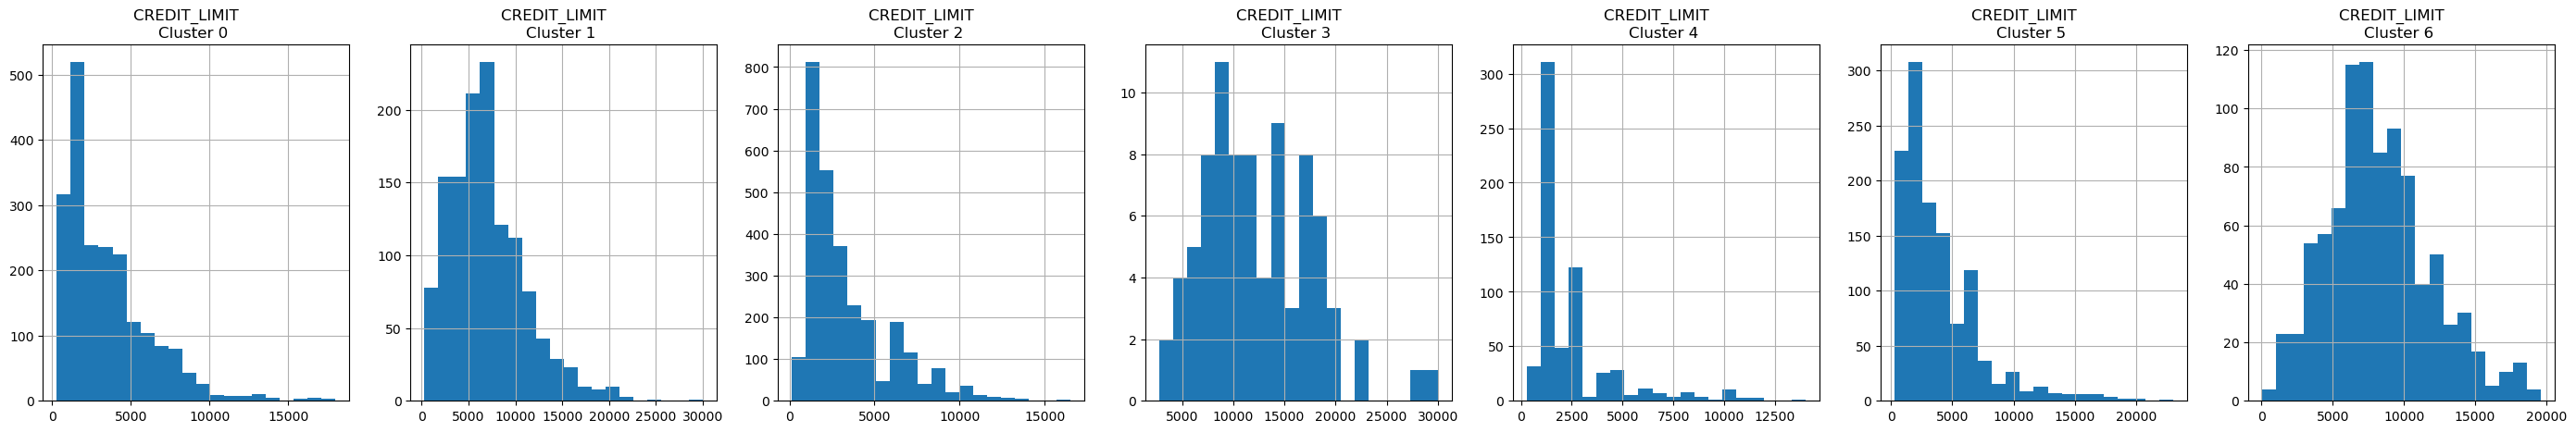

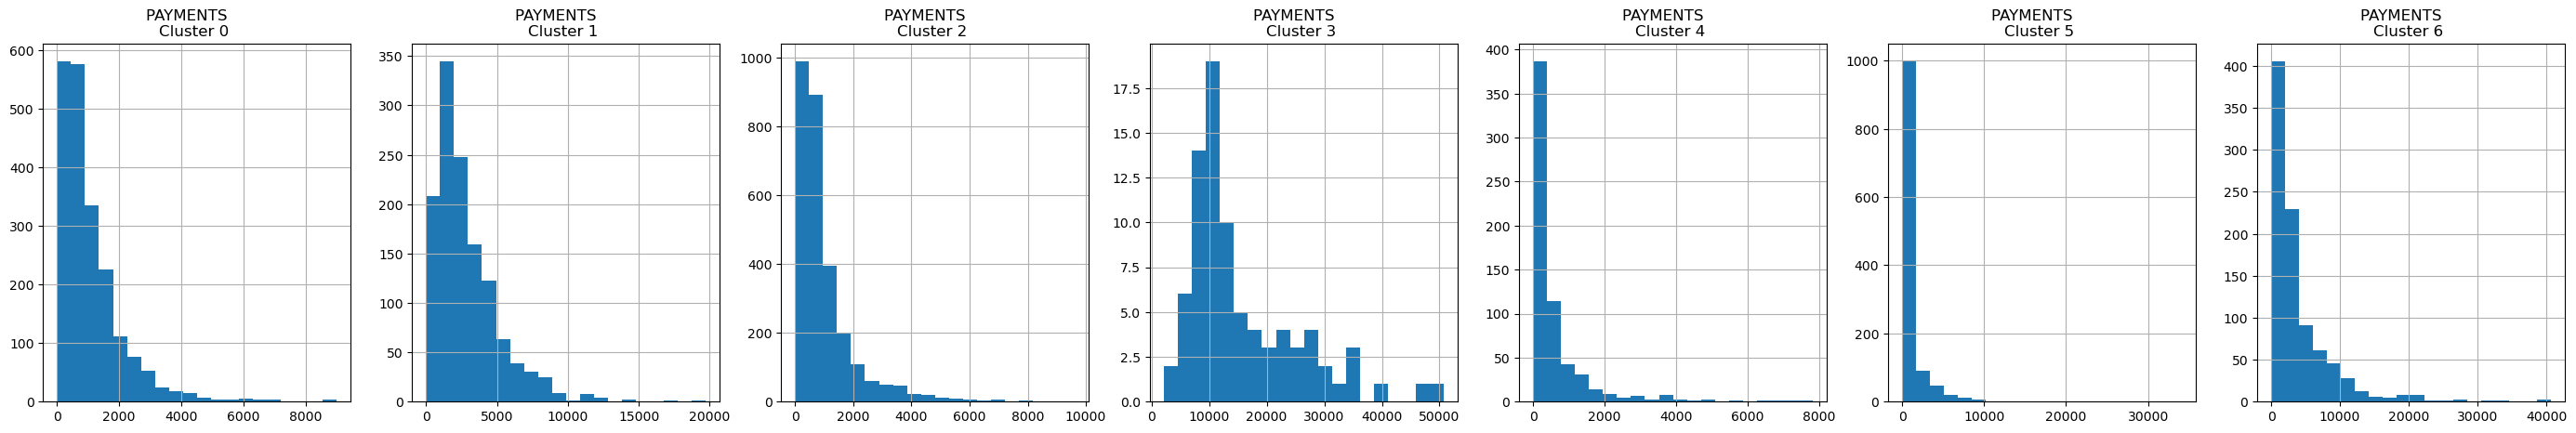

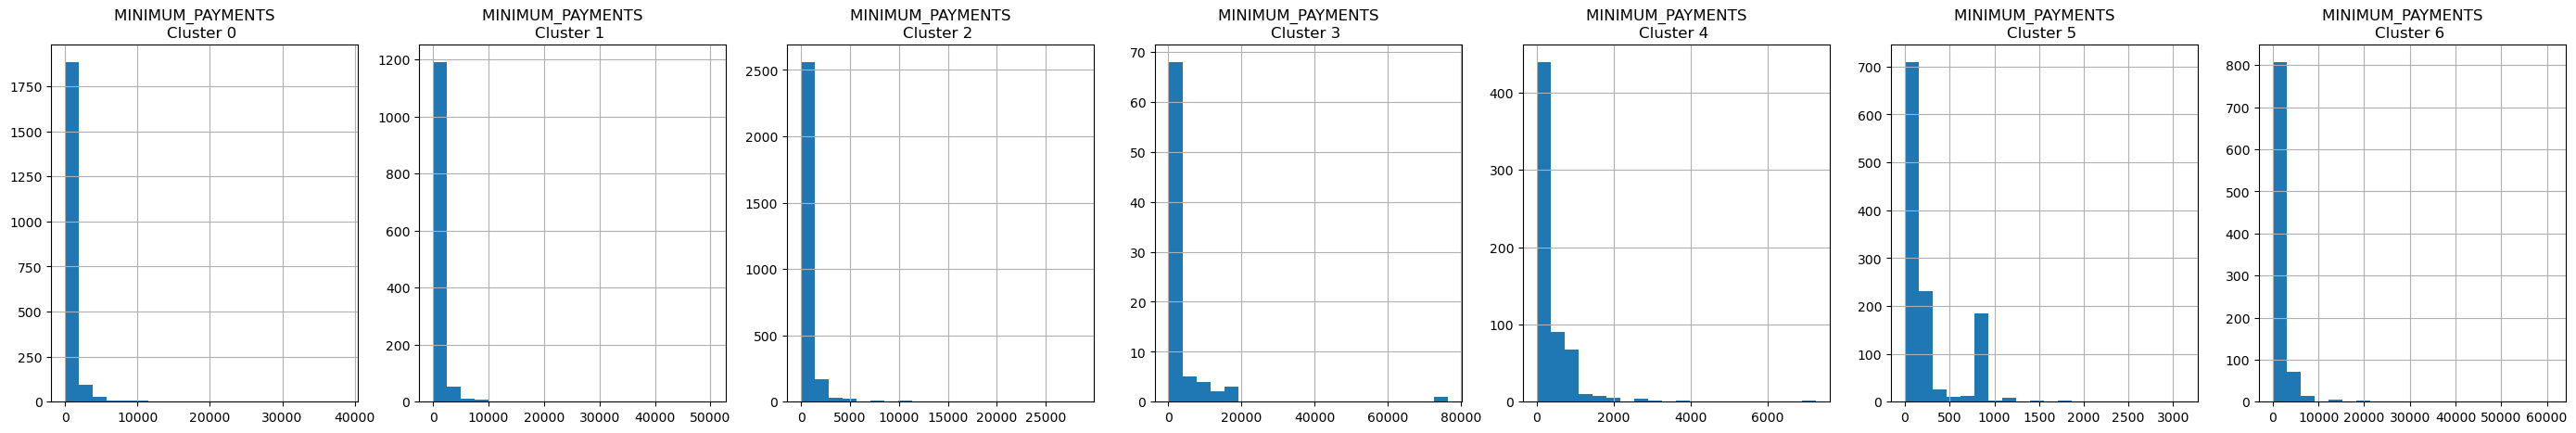

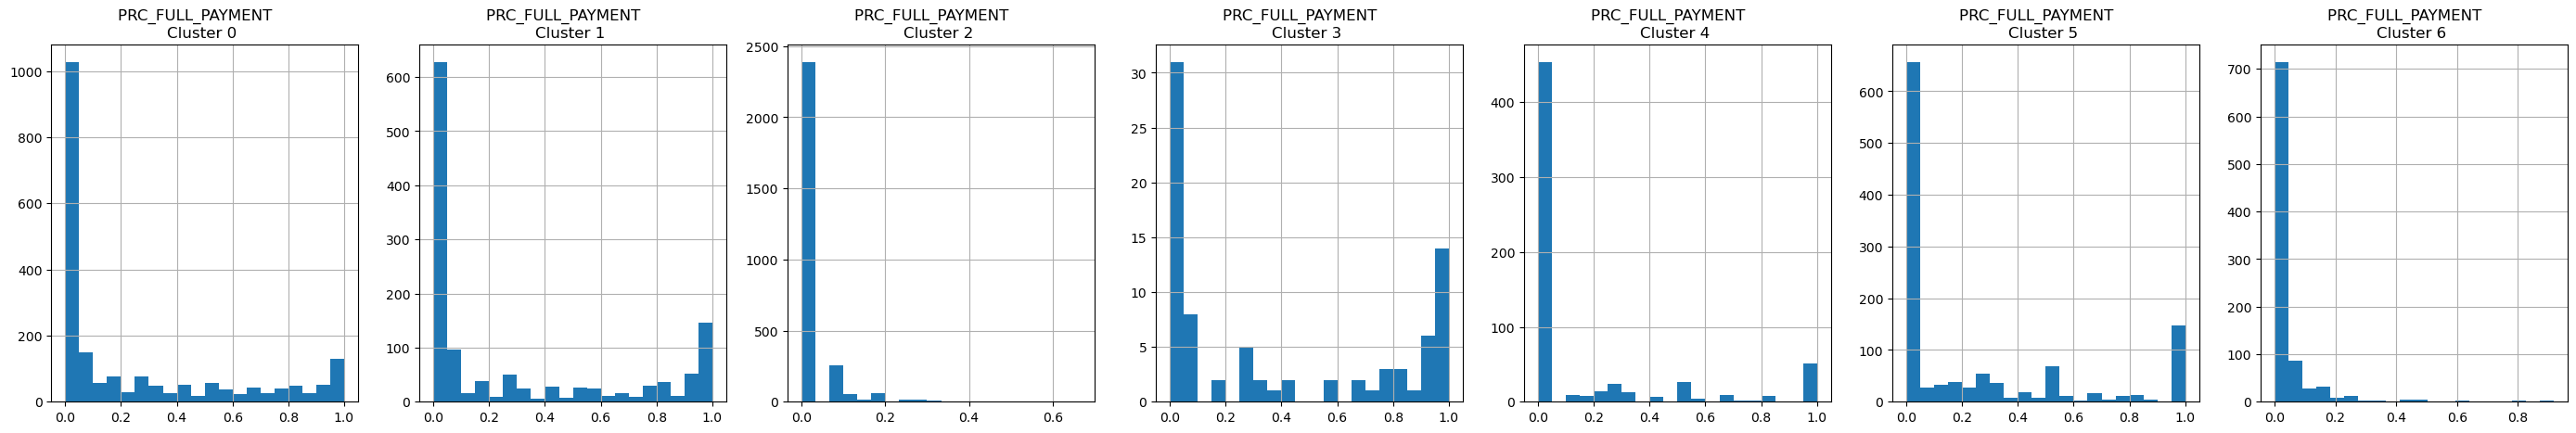

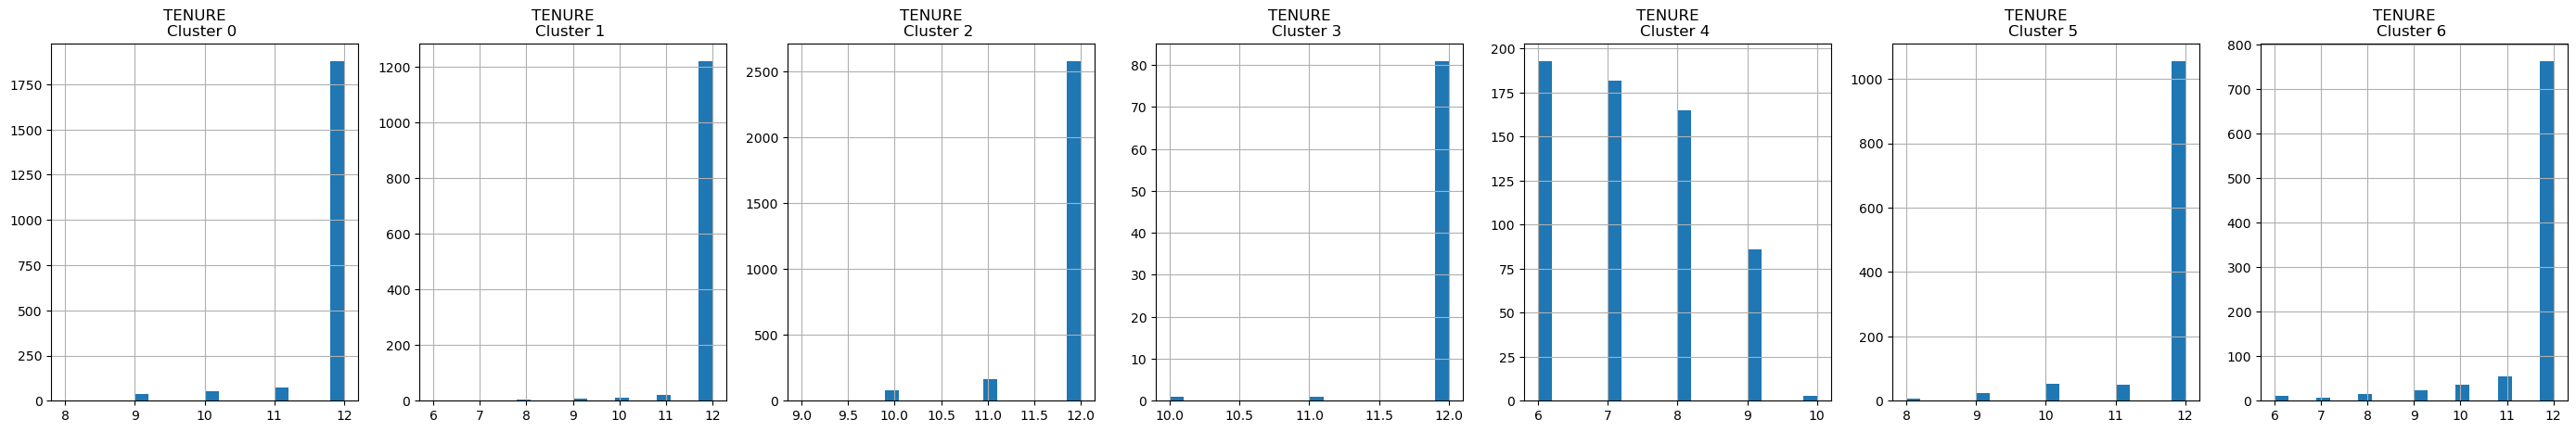

In [76]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [77]:
#Principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
p_comp = pca.fit_transform(scaled_df)

In [78]:
p_comp.shape

(8950, 2)

In [80]:
scaled_df.shape

(8950, 17)

In [83]:
pca_df = pd.DataFrame(data = p_comp ,columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138294,2.506497
2,0.969683,-0.383512
3,-0.873628,0.043168
4,-1.599435,-0.688583


In [84]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,2
1,-1.138294,2.506497,6
2,0.969683,-0.383512,1
3,-0.873628,0.043168,2
4,-1.599435,-0.688583,2


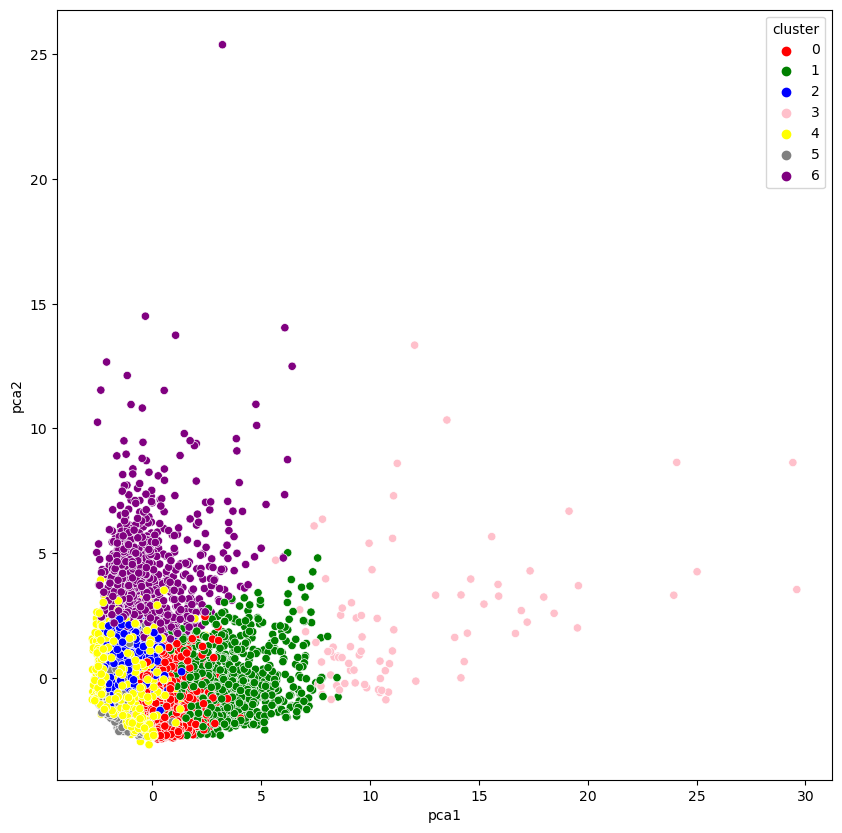

In [86]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1",y="pca2",hue='cluster',data = pca_df, palette = ['red','green','blue','pink','yellow','gray','purple'])
plt.show()